### Pick a few calibration FOVs

In [5]:
import sys,os
sys.path.append(os.path.dirname(os.path.abspath('')))
from ioMicro import *

Loaded decoded: -2.0467236042022705


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.72it/s]


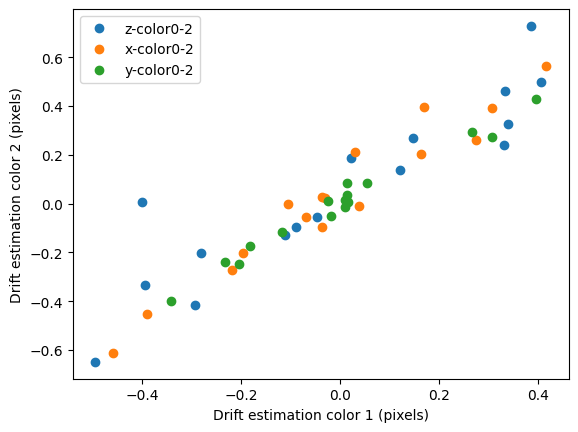

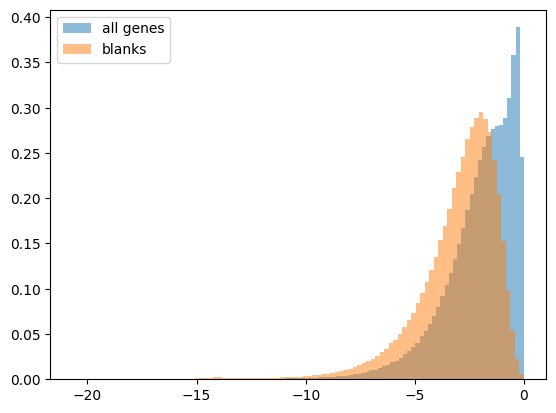

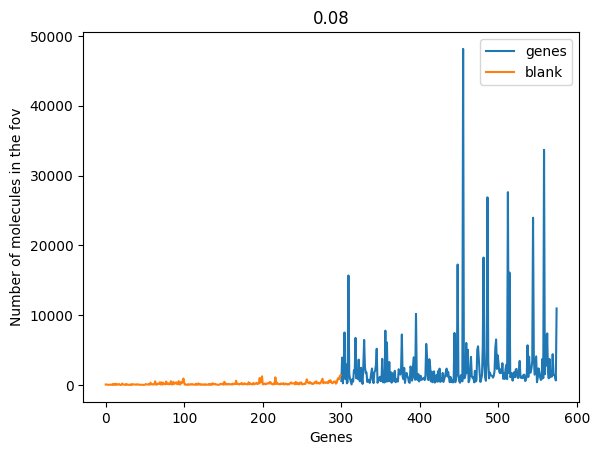

In [179]:
save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
scoresRef = np.load(save_folder+os.sep+'scoresRef.npy',allow_pickle=True)

fov,set_ = 'Conv_zscan__329', '_set2'
dec = decoder_simple(save_folder,fov,set_)
dec.load_decoded()
apply_flat_field(dec)
apply_fine_drift(dec,plt_val=True)
dec.ncols=3
scoresRefT = get_score_per_color(dec)
get_score_withRef(dec,scoresRef,plt_val=True,gene=None,iSs = None)
dec.th=-1.5
plot_statistics(dec)

In [136]:
viewer = plot_multigenes(dec,genes=['Ptbp1','Sox2'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=10)

In [132]:
keepf =  dec.scoreA>dec.th ### keep good score
icodesf = dec.icodesN[keepf]
XHfpr = dec.XH_pruned[keepf]
XHf = np.mean(XHfpr,axis=1)
XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
#zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
XF[:,-1] = dec.scoreA[keepf]
XF[:,-2] = np.where(keepf)[0]
mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
XF[:,-3]=mnD
mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
XF[:,-4]=mnH
genesf = dec.gns_names[icodesf]

In [169]:
def norm_brightness(dec,Xh,tag='med_col_raw'):
    ### renormalize the brightness according to flatfield
    Icol = Xh[:,-2].astype(int)
    H = Xh[:,-3].copy()
    cols=np.unique(Icol)
    if not hasattr(dec,'immeds'):
        immeds = []
        for icol in range(dec.ncols):
            dic = np.load(save_folder+os.sep+tag+str(icol)+'.npz')
            immed,resc=dic['im'],dic['resc']
            immeds.append(immed)
        dec.immeds = np.array(immeds)
        dec.resc = resc
    for icol in cols:
        keep = Icol==icol
        immed = dec.immeds[icol].copy()
        immed = immed/np.median(immed)
        x_,y_ = ((Xh[keep][:,1:3]/dec.resc).astype(int)%immed.shape).T
        norm_ = immed[x_,y_] 
        H[keep]=H[keep]/norm_
    Xh[:,-3] = H
    return Xh

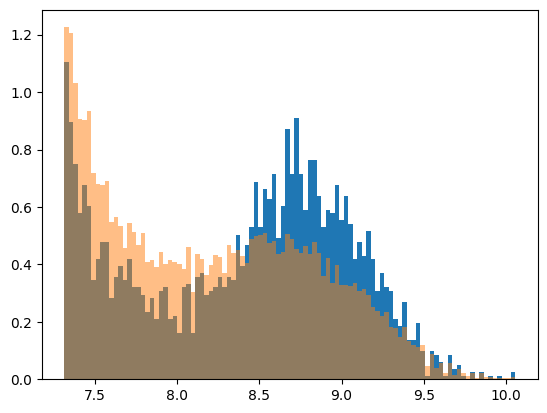

In [174]:
gene,icol = 'Ptbp1',2
tagH = 'Ptbp1'
dec.get_XH_tag(tag = tagH)#Aldh
Xh = norm_brightness(dec,dec.Xh)
Xh = dec.Xh
Xh = Xh[(Xh[:,-2]==icol)&(Xh[:,-3]>1500)]
XF_gene = XF[genesf==gene]

dsts,inds = cKDTree(Xh[:,:3]).query(XF_gene[:,:3])
Xh_ = Xh[inds[(dsts<10)],:]
plt.hist(np.log(Xh_[:,-3]),bins=100,density=True);
plt.hist(np.log(Xh[:,-3]),bins=100,density=True,alpha=0.5);

In [171]:
XF_gene.shape,len(Xh[Xh[:,-3]>2500])

((3451, 11), 8253)

In [172]:
Hths = [1800,1500,2500]

In [175]:
viewer = plot_points_direct(Xh[Xh[:,-3]>2500],percentage_max=95,color='g');
viewer = plot_multigenes(dec,genes=['Ptbp1'],colors=['r','g','b','m','c','y','w'],viewer = viewer,
                         smin=2,smax=20)

### Load data for ptbp1

In [1]:
Hths = [1800,1500,2500]

In [2]:
dic_f = {'set3': [88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 479, 483, 484, 485, 486, 487, 530, 532, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 653, 654, 655, 657, 660, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 704], 'set2': [117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 325, 326, 327, 328, 329, 330, 331, 332, 333, 345, 346, 347, 348, 349, 350, 351, 352, 358, 359, 360, 361, 362, 363, 364, 365, 366, 368, 371, 373, 374, 375, 376, 377, 378, 380, 381, 382, 514, 515, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 628, 629, 630, 631, 632, 633, 634], 'set6': [133, 184, 185, 186, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 286, 287, 288, 289, 290, 291, 292, 293, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 541, 542, 543, 544, 545, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 567, 568, 569, 570, 571, 572, 573, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617], 'set5': [317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 345, 346, 347, 348, 349, 350, 351, 366, 367, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 451, 452, 453, 454, 455, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 502, 503, 629, 630, 655, 666, 668, 669, 670, 671]}
elems = [('Conv_zscan__'+str(ifov).zfill(3),'_'+set_)for set_ in dic_f for ifov in dic_f[set_]]

In [3]:
import sys,os
sys.path.append(os.path.dirname(os.path.abspath('')))
from ioMicro import *

In [ ]:
save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
scoresRef = np.load(save_folder+os.sep+'scoresRef.npy',allow_pickle=True)

for fov,set_ in elems:
    save_final_decoding(save_folder,fov,set_,scoresRef,th=-1.5,
                        Hths=[1800,1500,2500],
                            tag_save = 'V2_finaldecs_',
                            plt_val=False,apply_flat=True,
                            tags_smFISH=['Aldh','Sox11'],
                            genes_smFISH=[['Igfbpl1','Aldh1l1','Ptbp1'],['Sox11','Sox2','Dcx']],force=False)

Loaded decoded: -2.5269250869750977


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.43it/s]


Loaded decoded: -2.0796098709106445


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.51it/s]


Loaded decoded: -2.049579381942749


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.43it/s]


Loaded decoded: -2.233001470565796


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.93it/s]


Loaded decoded: -1.7523870468139648


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.26it/s]


Loaded decoded: -2.2650911808013916


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.35it/s]


Loaded decoded: -1.8439841270446777


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00,  9.81it/s]


Loaded decoded: -2.0588316917419434


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.32it/s]


Loaded decoded: -2.002451181411743


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.26it/s]


Loaded decoded: -1.672273874282837


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.22it/s]


Failed Conv_zscan__099 _set3
Failed Conv_zscan__100 _set3
Failed Conv_zscan__101 _set3
Failed Conv_zscan__102 _set3
Loaded decoded: -2.3340275287628174


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.47it/s]


Loaded decoded: -2.1897809505462646


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.91it/s]


Loaded decoded: -2.0595438480377197


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.47it/s]


Loaded decoded: -1.7699470520019531


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00,  9.81it/s]


Loaded decoded: -1.9195823669433594


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.45it/s]


Loaded decoded: -1.2684221267700195


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 12.30it/s]


Failed Conv_zscan__109 _set3
Loaded decoded: -2.2432918548583984


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.70it/s]


Loaded decoded: -2.3537261486053467


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.49it/s]


Failed Conv_zscan__112 _set3
Loaded decoded: -2.1983630657196045


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.22it/s]


Failed Conv_zscan__114 _set3
Loaded decoded: -2.1231281757354736


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.11it/s]


Loaded decoded: -2.276763439178467


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.91it/s]


Loaded decoded: -1.9846813678741455


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.51it/s]


Loaded decoded: -1.916935682296753


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.24it/s]


Loaded decoded: -0.39811253547668457


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:01<00:00, 32.85it/s]


Loaded decoded: -0.5757448673248291


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 20.03it/s]


Loaded decoded: -2.2394237518310547


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.74it/s]


Loaded decoded: -1.632951259613037


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.23it/s]


Loaded decoded: -1.973008394241333


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.28it/s]


Loaded decoded: -2.317154884338379


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.99it/s]


Loaded decoded: -1.9938812255859375


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.55it/s]


Loaded decoded: -2.2837579250335693


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.81it/s]


Loaded decoded: -2.0111896991729736


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.06it/s]


Loaded decoded: -2.272392511367798


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.63it/s]


Loaded decoded: -1.2090420722961426


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 12.35it/s]


Loaded decoded: -1.3041749000549316


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.62it/s]


Loaded decoded: -1.871994972229004


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.53it/s]


Loaded decoded: -1.9751460552215576


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.52it/s]


Loaded decoded: -4.749061107635498


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.14it/s]


Failed Conv_zscan__544 _set3
Loaded decoded: -2.240743398666382


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.80it/s]


Loaded decoded: -2.1843836307525635


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.97it/s]


Failed Conv_zscan__547 _set3
Loaded decoded: -2.3833906650543213


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.76it/s]


Loaded decoded: -2.4415297508239746


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.74it/s]


Loaded decoded: -2.4212706089019775


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.76it/s]


Loaded decoded: -2.042253255844116


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00,  9.66it/s]


Loaded decoded: -2.0121564865112305


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.26it/s]


Loaded decoded: -1.8294124603271484


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00,  9.97it/s]


Loaded decoded: -1.9342830181121826


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.30it/s]


Loaded decoded: -2.1923608779907227


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.82it/s]


Loaded decoded: -1.8798224925994873


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.07it/s]


Loaded decoded: -2.0638742446899414


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00,  9.61it/s]


Loaded decoded: -1.8667542934417725


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.03it/s]


Loaded decoded: -1.967315435409546


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.46it/s]


Loaded decoded: -1.233396053314209


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.79it/s]


Loaded decoded: -1.9232189655303955


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.54it/s]


Loaded decoded: -2.317939043045044


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.57it/s]


Loaded decoded: -2.292039155960083


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.05it/s]


Loaded decoded: -2.383467197418213


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.77it/s]


Loaded decoded: -2.4916322231292725


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.27it/s]


Loaded decoded: -2.0307934284210205


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.35it/s]


Failed Conv_zscan__571 _set3
Loaded decoded: -0.09270834922790527


100%|████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 1199.82it/s]


Loaded decoded: -2.1022140979766846


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.28it/s]


Loaded decoded: -2.385087728500366


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.68it/s]


Loaded decoded: -3.638479232788086


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.97it/s]


Loaded decoded: -1.6319992542266846


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:01<00:00, 25.44it/s]


Loaded decoded: -3.3731958866119385


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 12.67it/s]


Loaded decoded: -2.6347970962524414


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.75it/s]


Loaded decoded: -2.3750033378601074


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.38it/s]


Loaded decoded: -1.4280672073364258


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.01it/s]


Loaded decoded: -1.5922141075134277


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.60it/s]


Loaded decoded: -2.381791353225708


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.52it/s]


Loaded decoded: -2.2370033264160156


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.84it/s]


Loaded decoded: -2.211064338684082


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.30it/s]


Loaded decoded: -2.2072741985321045


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.48it/s]


Loaded decoded: -2.3813588619232178


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.07it/s]


Loaded decoded: -1.428701400756836


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.94it/s]


Loaded decoded: -1.2483289241790771


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.06it/s]


Loaded decoded: -2.5078165531158447


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.01it/s]


Loaded decoded: -0.77339768409729


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.77it/s]


Loaded decoded: -0.5431337356567383


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 21.68it/s]


Loaded decoded: -2.015833616256714


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.65it/s]


Loaded decoded: -2.556035041809082


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.02it/s]


Loaded decoded: -2.2850685119628906


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.21it/s]


Loaded decoded: -2.4343433380126953


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.20it/s]


Loaded decoded: -2.4990854263305664


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.69it/s]


Loaded decoded: -2.201885938644409


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.51it/s]


Loaded decoded: -2.2622880935668945


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.30it/s]


Loaded decoded: -2.3103394508361816


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.72it/s]


Loaded decoded: -2.1529057025909424


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.32it/s]


Failed Conv_zscan__601 _set3
Loaded decoded: -2.094299077987671


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.40it/s]


Loaded decoded: -2.2116074562072754


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.23it/s]


Loaded decoded: -2.190791368484497


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.15it/s]


Loaded decoded: -2.1154861450195312


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.44it/s]


Loaded decoded: -2.163330078125


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.89it/s]


Loaded decoded: -2.1972291469573975


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.03it/s]


Loaded decoded: -2.206254482269287


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.00it/s]


Loaded decoded: -2.157102108001709


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.86it/s]


Loaded decoded: -2.213587760925293


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.74it/s]


Loaded decoded: -2.2303192615509033


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.64it/s]


Loaded decoded: -2.220480442047119


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.71it/s]


Loaded decoded: -2.3516550064086914


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.62it/s]


Loaded decoded: -2.197932720184326


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.48it/s]


Loaded decoded: -2.1375439167022705


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.11it/s]


Loaded decoded: -2.2947745323181152


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.34it/s]


Loaded decoded: -2.1343436241149902


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.07it/s]


Loaded decoded: -2.2384133338928223


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.25it/s]


Loaded decoded: -2.2863218784332275


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.89it/s]


Loaded decoded: -2.243065357208252


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.74it/s]


Loaded decoded: -2.426393985748291


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.54it/s]


Loaded decoded: -2.482510566711426


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.35it/s]


Loaded decoded: -2.214205265045166


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.71it/s]


Loaded decoded: -2.2690412998199463


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.64it/s]


Loaded decoded: -2.287041425704956


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.80it/s]


Loaded decoded: -2.388495683670044


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.43it/s]


Loaded decoded: -2.3135995864868164


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.59it/s]


Loaded decoded: -2.1342742443084717


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.93it/s]


Failed Conv_zscan__695 _set3
Failed Conv_zscan__696 _set3
Loaded decoded: -1.8574931621551514


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00,  9.66it/s]


Loaded decoded: -1.2195279598236084


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.81it/s]


Loaded decoded: -2.2697317600250244


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.42it/s]


Loaded decoded: -2.4063796997070312


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.43it/s]


Failed Conv_zscan__701 _set3
Loaded decoded: -0.3920574188232422


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:01<00:00, 34.10it/s]


Loaded decoded: -1.403538703918457


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.92it/s]


Loaded decoded: -2.6194088459014893


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.27it/s]


Loaded decoded: -2.6082711219787598


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.23it/s]


Loaded decoded: -2.525005340576172


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.31it/s]


Loaded decoded: -2.687539577484131


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.10it/s]


Loaded decoded: -2.6600546836853027


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.05it/s]


Loaded decoded: -2.7175495624542236


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:06<00:00,  7.87it/s]


Loaded decoded: -2.5320634841918945


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.22it/s]


Loaded decoded: -2.3343679904937744


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.70it/s]


Loaded decoded: -2.165565252304077


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.23it/s]


Loaded decoded: -2.533137798309326


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.59it/s]


Loaded decoded: -2.4932401180267334


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.45it/s]


Loaded decoded: -2.7395200729370117


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.20it/s]


Loaded decoded: -1.3555381298065186


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.22it/s]


Loaded decoded: -1.6174371242523193


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.58it/s]


Loaded decoded: -1.0152785778045654


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.95it/s]


Loaded decoded: -1.2975115776062012


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.98it/s]


Loaded decoded: -1.8090672492980957


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.10it/s]


Loaded decoded: -2.252331495285034


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.17it/s]


Failed Conv_zscan__315 _set2
Loaded decoded: -2.444025993347168


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.45it/s]


Loaded decoded: -2.520927906036377


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.38it/s]


Loaded decoded: -2.5000531673431396


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.32it/s]


Failed Conv_zscan__325 _set2
Loaded decoded: -2.24223256111145


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.93it/s]


Loaded decoded: -2.3099188804626465


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.95it/s]


Loaded decoded: -2.11677622795105


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.23it/s]


Loaded decoded: -2.2230608463287354


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.88it/s]


Loaded decoded: -2.3052890300750732


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.88it/s]


Loaded decoded: -2.422337293624878


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.68it/s]


Loaded decoded: -2.329314947128296


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.79it/s]


Failed Conv_zscan__345 _set2
Loaded decoded: -2.2149906158447266


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.21it/s]


Loaded decoded: -2.1856112480163574


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.12it/s]


Loaded decoded: -2.112964630126953


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.24it/s]


Loaded decoded: -2.030318260192871


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.20it/s]


Failed Conv_zscan__350 _set2
Loaded decoded: -2.4454047679901123


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.60it/s]


Loaded decoded: -2.322575330734253


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.70it/s]


Loaded decoded: -2.189899206161499


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.79it/s]


Loaded decoded: -2.3503425121307373


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.62it/s]


Loaded decoded: -2.1976044178009033


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.23it/s]


Loaded decoded: -2.2070109844207764


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.05it/s]


Loaded decoded: -2.0623393058776855


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.30it/s]


Loaded decoded: -2.300351619720459


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.08it/s]


Loaded decoded: -2.0015389919281006


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.33it/s]


Loaded decoded: -2.1870598793029785


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.94it/s]


Loaded decoded: -2.125542163848877


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.50it/s]


Loaded decoded: -2.2351579666137695


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.14it/s]


Loaded decoded: -2.3228485584259033


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.88it/s]


Loaded decoded: -2.404066801071167


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.98it/s]


Loaded decoded: -2.1055846214294434


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.14it/s]


Loaded decoded: -2.26628041267395


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.18it/s]


Loaded decoded: -2.330277442932129


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.70it/s]


Loaded decoded: -2.396733045578003


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.40it/s]


Loaded decoded: -3.00982666015625


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.41it/s]


Loaded decoded: -2.560727596282959


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.61it/s]


Loaded decoded: -2.2777764797210693


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.23it/s]


Loaded decoded: -2.3584816455841064


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.59it/s]


Loaded decoded: -2.5905470848083496


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.26it/s]


Loaded decoded: -2.3967783451080322


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.57it/s]


Loaded decoded: -2.7520062923431396


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:06<00:00,  7.80it/s]


Loaded decoded: -1.6415483951568604


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:01<00:00, 43.32it/s]


Loaded decoded: -3.1833865642547607


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 13.30it/s]


Loaded decoded: -5.558928966522217


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:06<00:00,  7.60it/s]


Loaded decoded: -2.4578521251678467


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.08it/s]


In [108]:
save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
scoresRef = np.load(save_folder+os.sep+'scoresRef.npy',allow_pickle=True)

fov,set_ = 'Conv_zscan__582', '_set2'
dec = decoder_simple(save_folder,fov,set_)

In [109]:
load_segmentation(dec)

In [110]:
dic = np.load(dec.fl_dapi)
im_segm = dic['segm_2d']
dec.shape = dic['shape']
#im_segm = expand_segmentation(im_segm,nexpand=5)

In [113]:
im_segm_ = stitch3d_new(im_segm,minsz = 200,maxsz = 1000,th_int=0.66,th_cover=0.8,th_max_subcell=0.66,nexpand = 5)

In [114]:
import napari
#im_segm_ = stitch3d(im_segm,th_int=0.5)
v = napari.view_labels(im_segm_)
v.add_labels(im_segm)

<Labels layer 'im_segm' at 0x194e2e5d130>

C:\Software\anaconda3\envs\cellpose\lib\site-packages\napari\layers\labels\labels.py:906: UserWarning: Contours are not displayed during 3D rendering
  warnings.warn(
C:\Software\anaconda3\envs\cellpose\lib\site-packages\napari\layers\labels\labels.py:906: UserWarning: Contours are not displayed during 3D rendering
  warnings.warn(
C:\Software\anaconda3\envs\cellpose\lib\site-packages\napari\layers\labels\labels.py:906: UserWarning: Contours are not displayed during 3D rendering
  warnings.warn(
C:\Software\anaconda3\envs\cellpose\lib\site-packages\napari\layers\labels\labels.py:906: UserWarning: Contours are not displayed during 3D rendering
  warnings.warn(
C:\Software\anaconda3\envs\cellpose\lib\site-packages\napari\layers\labels\labels.py:906: UserWarning: Contours are not displayed during 3D rendering
  warnings.warn(
C:\Software\anaconda3\envs\cellpose\lib\site-packages\napari\layers\labels\labels.py:906: UserWarning: Contours are not displayed during 3D rendering
  warnings.warn

In [411]:
im_segm___ = expand_segmentation(im_segm[3:5])

In [412]:
v = napari.view_labels(im_segm___)
v.add_labels(im_segm[3:5])

<Labels layer 'Labels' at 0x22a67149e20>

In [186]:
dic = np.load(dec.save_folder+os.sep+'V2_finaldecs_'+dec.fov+'--'+dec.set_+'.npz')
list(dic.keys())

['XF', 'genes', 'cellinfo', 'header_cells', 'header']

In [187]:
XF = dic['XF']
genes = dic['genes']

In [188]:
gns_names = np.unique(genes)
[gn for gn in gns_names if 'smfish' in gn.lower()]

['Aldh1l1_smFISH',
 'Dcx_smFISH',
 'Igfbpl1_smFISH',
 'Ptbp1_smFISH',
 'Sox11_smFISH',
 'Sox2_smFISH']

In [ ]:
if False:
    if scoresRef is None: scoresRef=scoresRefT
    else: combine_scoresRef(scoresRef,scoresRefT)
    np.save(save_folder+os.sep+'scoresRef.npy',scoresRef)

### Given the base decoding for each fov, run across all datasets with consistent values

In [ ]:
from ioMicro import *
save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
scoresRef = np.load(save_folder+os.sep+'scoresRef.npy',allow_pickle=True)

In [ ]:
def save_final_decoding(save_folder,fov,set_,scoresRef,th=-1.5,plt_val=False,
                        tags_smFISH=['Aldh','Sox11'],
                        genes_smFISH=[['Igfbpl1','Aldh1l1','Ptbp1'],['Sox11','Sox2','Dcx']],Hths=None,force=False):
    """
    This loads the decoded points renormalizes them and picks the most confident points
    """
    if type(scoresRef) is str: scoresRef = np.load(scoresRef,allow_pickle=True)
    dec = decoder_simple(save_folder,fov,set_)
    save_fl = dec.save_folder+os.sep+os.sep+'finaldecs_'+dec.fov.split('.')[0]+'--'+dec.set_+'.npz'
    if not os.path.exists(save_fl) or force:
        #print(dec.fov,dec.set_)
        try:
            load_segmentation(dec)
            dec.load_decoded()
            apply_flat_field(dec)
            apply_fine_drift(dec,plt_val=plt_val)
            
            #for i in range(3):
            #    apply_brightness_correction(dec)
            #get_scores(dec,plt_val=plt_val)
            get_score_withRef(dec,scoresRef,plt_val=plt_val,gene=None,iSs = None)
            dec.th=th
            #plot_1gene(dec,gene='Gad1',viewer = None)
            if plt_val:
                viewer = plot_multigenes(dec,genes=['Adcy1','Slc1a2','Psap'],colors=['r','g','b','m','c','y','w'],viewer = None,
                                         smin=1,smax=2.5,drift=dec.drift[0],
                                        resc = dec.shape/dec.im_segm_.shape)
                viewer.add_labels(dec.im_segm_);
            if plt_val:
                plot_statistics(dec)
            #print(dec.gns_ordered)

            keepf =  dec.scoreA>dec.th ### keep good score
            icodesf = dec.icodesN[keepf]
            XHfpr = dec.XH_pruned[keepf]
            XHf = np.mean(XHfpr,axis=1)
            if Hths is None:
                ICol = XHfpr[:,:,-2].astype(int)
                Hths = [np.percentile(XHfpr[ICol==icol][:,-3],15) for icol in np.unique(ICol)]
            
            XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
            #zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
            XF[:,-1] = dec.scoreA[keepf]
            XF[:,-2] = np.where(keepf)[0]
            mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
            XF[:,-3]=mnD
            mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
            XF[:,-4]=mnH
            genesf = dec.gns_names[icodesf]
            
            ### deal with smFISH
            for tag_smFISH,gns_smFISH in zip(tags_smFISH,genes_smFISH):
                dec.get_XH_tag(tag=tag_smFISH)#dec.get_XH_tag(tag='Aldh1')
                Xh = norm_brightness(dec,dec.Xh)
                tags = [gn+'_smFISH' for gn in gns_smFISH]#['Igfbp_smFISH','Aldh1l1_smFISH','Ptbp1_smFISH']
                
                for icol,tag in enumerate(tags):
                    Xh_ = Xh[Xh[:,-2]==icol]
                    Xh_=Xh_[Xh_[:,-3]>Hths[icol]]
                    Xh_=Xh_[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
                    Xh_[:,-1]=0
                    Xh_[:,-2]=-1
                    Xh_[:,-3]=0
                    Xh_[:,-4]=0
                    XF = np.concatenate([XF,Xh_])
                    genesf = np.concatenate([genesf,[tag]*len(Xh_)])

            cell_id,good = get_cell_id(dec,XF)
            XF_ = np.concatenate([XF[good],cell_id[:,np.newaxis]],axis=-1)
            genesf_ = genesf[good]
            iset = int(dec.set_.split('_set')[-1])
            ifov = int(dec.fov.split('_')[-1].split('.')[0])
            isets = np.array([iset]*len(cell_id))[:,np.newaxis]
            ifovs = np.array([ifov]*len(cell_id))[:,np.newaxis]
            cell_id = cell_id[:,np.newaxis]
            XF_ = np.concatenate([XF[good],cell_id,ifovs,isets],axis=-1)

            get_xyfov(dec)
            XF_ = XF_[:,list(np.arange(XF_.shape[-1]))+[-1,-1]]
            XF_[:,-2:]=dec.xfov,dec.yfov
            header = ['z','x','y','abs_brightness','cor','brightness','color','mean_bightness_variation','mean_distance_variation',
                      'index_from_XH_pruned','score','cell_id','ifov','iset','xfov','yfov']
            icells,vols = np.unique(dec.im_segm_,return_counts=True)
            cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))
            icells,vols = np.unique(dec.im_segm_,return_counts=True)
            cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))
            cellinfo = cms[:,[0,0,0,1,2,0,0]]
            cellinfo[:,0]=icells
            cellinfo[:,1]=vols
            cellinfo[:,-2:]=dec.xfov,dec.yfov
            header_cells = ['cell_id','volm','zc','xc','yc','xfov','yfov']

            np.savez_compressed(save_fl,XF=XF_.astype(np.float32),
                                genes = genesf_,cellinfo=cellinfo.astype(np.float32),header_cells=header_cells,header=header)
        except:
            print("Failed",dec.fov,dec.set_)

In [ ]:
#elems = [('Conv_zscan__'+str(ifov).zfill(3),'_'+set_)for set_ in ['set2'] for ifov in dic_f[set_]]
for fov,set_ in tqdm(elems):
    save_final_decoding(save_folder,fov,set_,scoresRef,th=-1.5,plt_val=False,
                            tags_smFISH=['Aldh','Sox11'],
                            genes_smFISH=[['Igfbpl1','Aldh1l1','Ptbp1'],['Sox11','Sox2','Dcx']],Hths=None,force=True)

### Get counts per cell into a single dataset

In [ ]:
import pandas as pd
save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
#save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
save_fls = glob.glob(save_folder+os.sep+'finaldecs_*')

In [ ]:
save_fls_ = [fl for fl in save_fls if ('_set5' in fl)]# in fl if '035' in fl][0]
cell_df,df=None,None
for save_fl in tqdm(np.sort(save_fls_)[:]):
    ### load info
    dic = np.load(save_fl)
    XF = dic['XF']
    header = list(dic['header'])
    genes_decoded = dic['genes']
    cells = dic['cellinfo'][1:]
    header_cells = dic['header_cells']
    ### Rethrehold based on score
    iscore = list(header).index('score')
    scoreA = XF[:,iscore]
    keep = scoreA>-1.5
    ugns,gns_i = np.unique(genes_decoded[keep],return_inverse=True)

    icell = header.index('cell_id')
    icells = XF[keep,icell].astype(int)
    
    icellsf = cells[:,0].astype(int)
    
    mcell = np.max(icellsf)+1
    gn_cell,gn_cell_cts = np.unique(mcell*gns_i+icells,return_counts=True)
    len(gn_cell)
    igns_ = gn_cell//mcell
    icells_ = gn_cell%mcell
    Mcts = np.zeros([mcell,len(ugns)])
    Mcts[icells_,igns_]=gn_cell_cts

    Mcts[icellsf].shape
    ifov,iset = int(XF[0,header.index('ifov')]),int(XF[0,header.index('iset')])
    icellsnm = [icell+10**5*ifov for icell in icellsf]#icellsnm = [icell+10**5*ifov+10**9*iset for icell in icellsf]

    dfT = pd.DataFrame(Mcts[icellsf],columns=ugns,index=icellsnm)


    df = dfT if df is None else pd.concat([df,dfT])
    cell_dfT = pd.DataFrame(cells,columns=header_cells,index=icellsnm)
    cell_df = cell_dfT if cell_df is None else pd.concat([cell_df,cell_dfT])